In [174]:
import pandas as pd
import numpy as np
np.set_printoptions(precision = 4)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style = 'white', palette = 'colorblind')

from scipy import sparse
from numpy import count_nonzero

In [175]:
import imblearn
from imblearn.over_sampling import SMOTE

import sklearn.preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc


In [176]:
import pandas as pd
import numpy as np

In [177]:
df = pd.read_csv('Shill Bidding Dataset.csv')

In [178]:
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [180]:
df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [181]:
import seaborn as sns
import matplotlib.pyplot as plt


In [182]:
df.shape

(6321, 13)

In [183]:
## Obtaining basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [184]:
# Observing a sample of the dataframe - head

df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [185]:
# Obtaining a summary of the dataset basic statistics

df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [186]:
# Counting unique Auctions

df['Auction_ID'].value_counts()

589     26
1872    26
256     24
658     24
2498    23
        ..
1756     1
548      1
1971     1
458      1
2329     1
Name: Auction_ID, Length: 807, dtype: int64

In [187]:
# Counting unique Bidders

df['Bidder_ID'].value_counts()

a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
n***y      1
u***z      1
t***9      1
z***b      1
9***7      1
Name: Bidder_ID, Length: 1054, dtype: int64

In [188]:
# Counting Successive Outbidding's unique values

df['Successive_Outbidding'].value_counts()

0.0    5478
1.0     469
0.5     374
Name: Successive_Outbidding, dtype: int64

In [189]:
# Counting Auction Duration's unique values

df['Auction_Duration'].value_counts()

7     2427
3     1408
1     1289
5     1060
10     137
Name: Auction_Duration, dtype: int64

In [190]:
#Cleaning the dataset: duplicates, missing values and sparsity¶


In [191]:
# Checking for duplicates

print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 0 duplicates in the dataset.


In [192]:
# Checking if there are any missing values

df.isnull().values.any()

False

In [193]:
# Calculating the sparsity of the data

sparsity = 1 - count_nonzero(df) / df.size
print('Sparsity of the dataframe is: ' + str(round(sparsity, 2)) + '.')

Sparsity of the dataframe is: 0.26.


In [194]:
# Confirming if data is sparse

sparse.issparse(df)

False

In [195]:
# Dropping columns

df2 = df.drop(columns = ['Record_ID', 'Auction_ID', 'Bidder_ID'])
df2

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [196]:
#Random Forest Classifier - First test¶


In [197]:
# Splitting the dataset into X and Y


# Assigning the independet variables to a new dataset X

X = df2.drop('Class', axis = 1)

# Assigning the dependent variable to a new variable y

y = df2['Class']

In [198]:
# Splitting the dataset into the training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
2882,0.200000,0.100000,0.0,0.000104,0.000000,0.000000,0.000104,0.666667,1
4340,0.142857,0.095238,0.0,0.164572,0.142857,0.000000,0.164525,0.000000,1
642,0.041667,0.083333,0.0,0.018495,0.000000,0.000000,0.018495,0.000000,1
2450,0.100000,0.032258,0.0,0.013026,0.419355,0.993593,0.013026,0.000000,7
3258,0.016129,0.011765,0.0,0.980719,0.788235,0.993528,0.980719,0.000000,7
...,...,...,...,...,...,...,...,...,...
3772,0.125000,0.023256,0.0,0.709292,0.581395,0.993528,0.709292,0.000000,7
5191,0.019231,0.040000,0.0,0.812326,0.280000,0.000000,0.812326,0.000000,5
5226,0.017241,0.083333,0.0,0.659924,0.000000,0.000000,0.659924,0.000000,7
5390,0.125000,0.142857,0.0,0.088314,0.000000,0.000000,0.088314,0.714286,3


In [199]:
# Training the model on the training set (not scaled or resampled dataset)

classifier_rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
classifier_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [200]:
# Predicting the test set results

y_pred_rfc = classifier_rfc.predict(X_test)
print(np.concatenate((y_pred_rfc.reshape(len(y_pred_rfc), 1), y_test.values.reshape(len(y_test), 1)), 1))


[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [201]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Confusion Matrix:')
print(cm_rfc)
print()
print('The accuracy of the Random Forest Classifier model is ' + str(
    round(accuracy_score(y_test, y_pred_rfc), 4)) + '.')

Confusion Matrix:
[[1419    6]
 [   2  154]]

The accuracy of the Random Forest Classifier model is 0.9949.


In [202]:
# Printing a report of all scores for the model

print(classification_report(y_test, y_pred_rfc, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1425
     Class 1       0.96      0.99      0.97       156

    accuracy                           0.99      1581
   macro avg       0.98      0.99      0.99      1581
weighted avg       1.00      0.99      0.99      1581



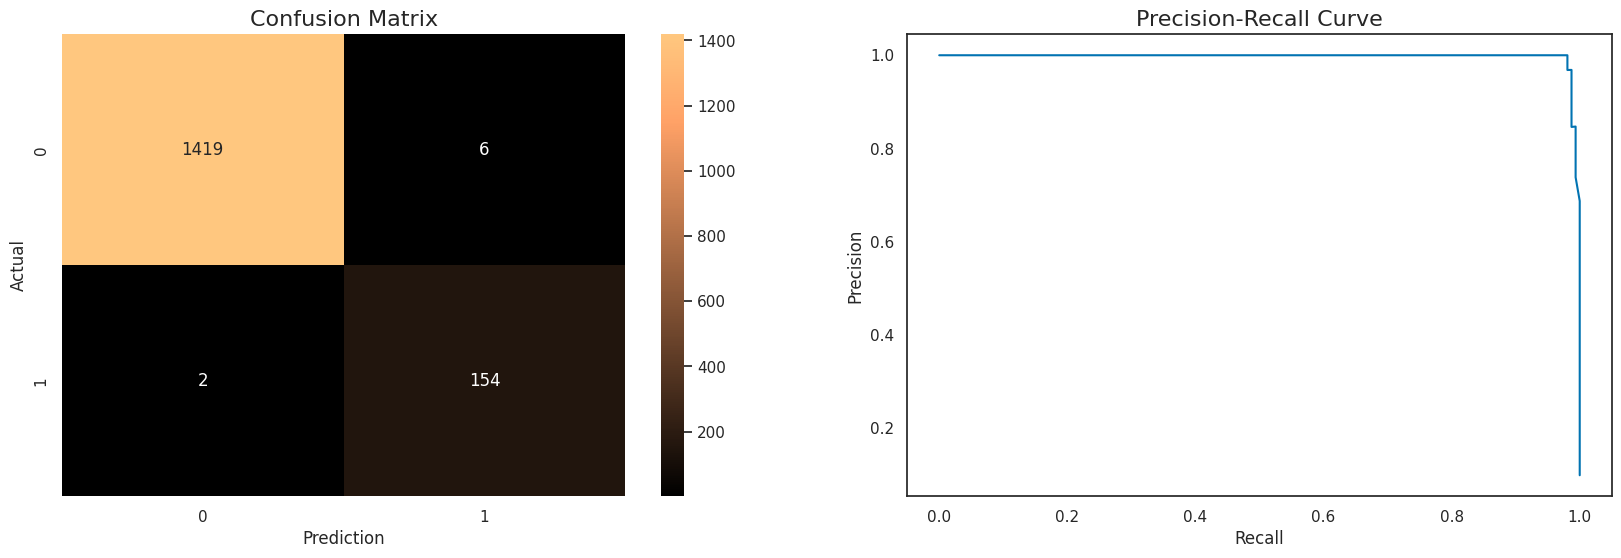

In [203]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_rfc, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_rfc = classifier_rfc.predict_proba(X_test)[:, 1]
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test, y_score_rfc)
ax[1].plot(recall_rfc, precision_rfc)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [204]:
# Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the Random Forest Classifier in the scenario with no treatment is ' + str(
    round(auc(recall_rfc, precision_rfc), 4)) + '.')

The AUC for the Random Forest Classifier in the scenario with no treatment is 0.997.


In [205]:
#K-Nearest Neighbor Classifier - First test¶


In [206]:
# Training the model on the training set

classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [207]:
# Predicting the test set results

y_pred_knn = classifier_knn.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn), 1), y_test.values.reshape(len(y_test), 1)), 1))


[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [208]:
# Making the Confusion Matrix and calculating the accuracy of the model

cm_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(cm_knn)
print()
print('The accuracy of the K-Nearest Neighbors model is ' + str(
    round(accuracy_score(y_test, y_pred_knn), 4)) + '.')

Confusion Matrix:
[[1424    1]
 [   6  150]]

The accuracy of the K-Nearest Neighbors model is 0.9956.


In [209]:
# Printing a report of all scores for the model

print(classification_report(y_test, y_pred_knn, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1425
     Class 1       0.99      0.96      0.98       156

    accuracy                           1.00      1581
   macro avg       0.99      0.98      0.99      1581
weighted avg       1.00      1.00      1.00      1581



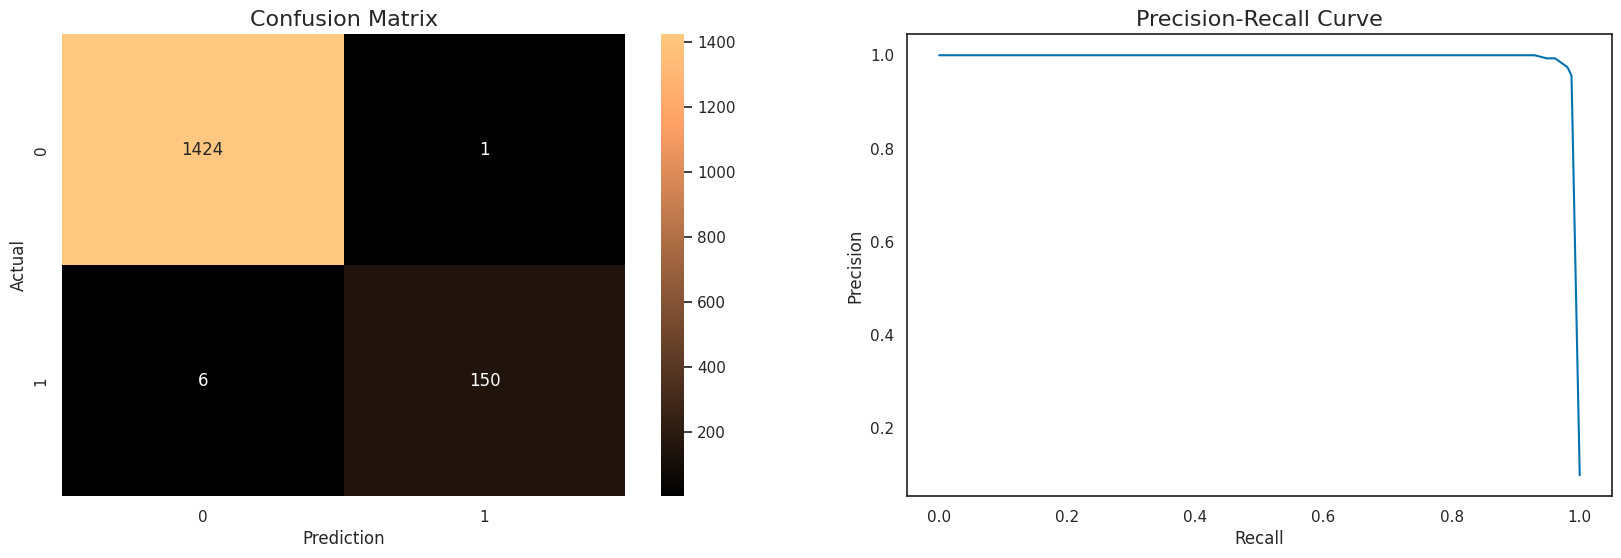

In [210]:
# Confusion Matrix Heatmap and Precision-Recall Curve

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.heatmap(cm_knn, ax = ax[0], annot = True, cmap = plt.cm.copper, fmt = 'g')
ax[0].set_title('Confusion Matrix', fontsize = 16)
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')

y_score_knn = classifier_knn.predict_proba(X_test)[:, 1]
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_score_knn)
ax[1].plot(recall_knn, precision_knn)
ax[1].set_title('Precision-Recall Curve', fontsize = 16)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
plt.show()

In [211]:
 #Calculating Area Under Curve - AUC (Precision-Recall)

print('The AUC for the K-Nearest Neighbor Classifier in the scenario with no treatment is ' + str(
    round(auc(recall_knn, precision_knn), 4)) + '.')

The AUC for the K-Nearest Neighbor Classifier in the scenario with no treatment is 0.9933.


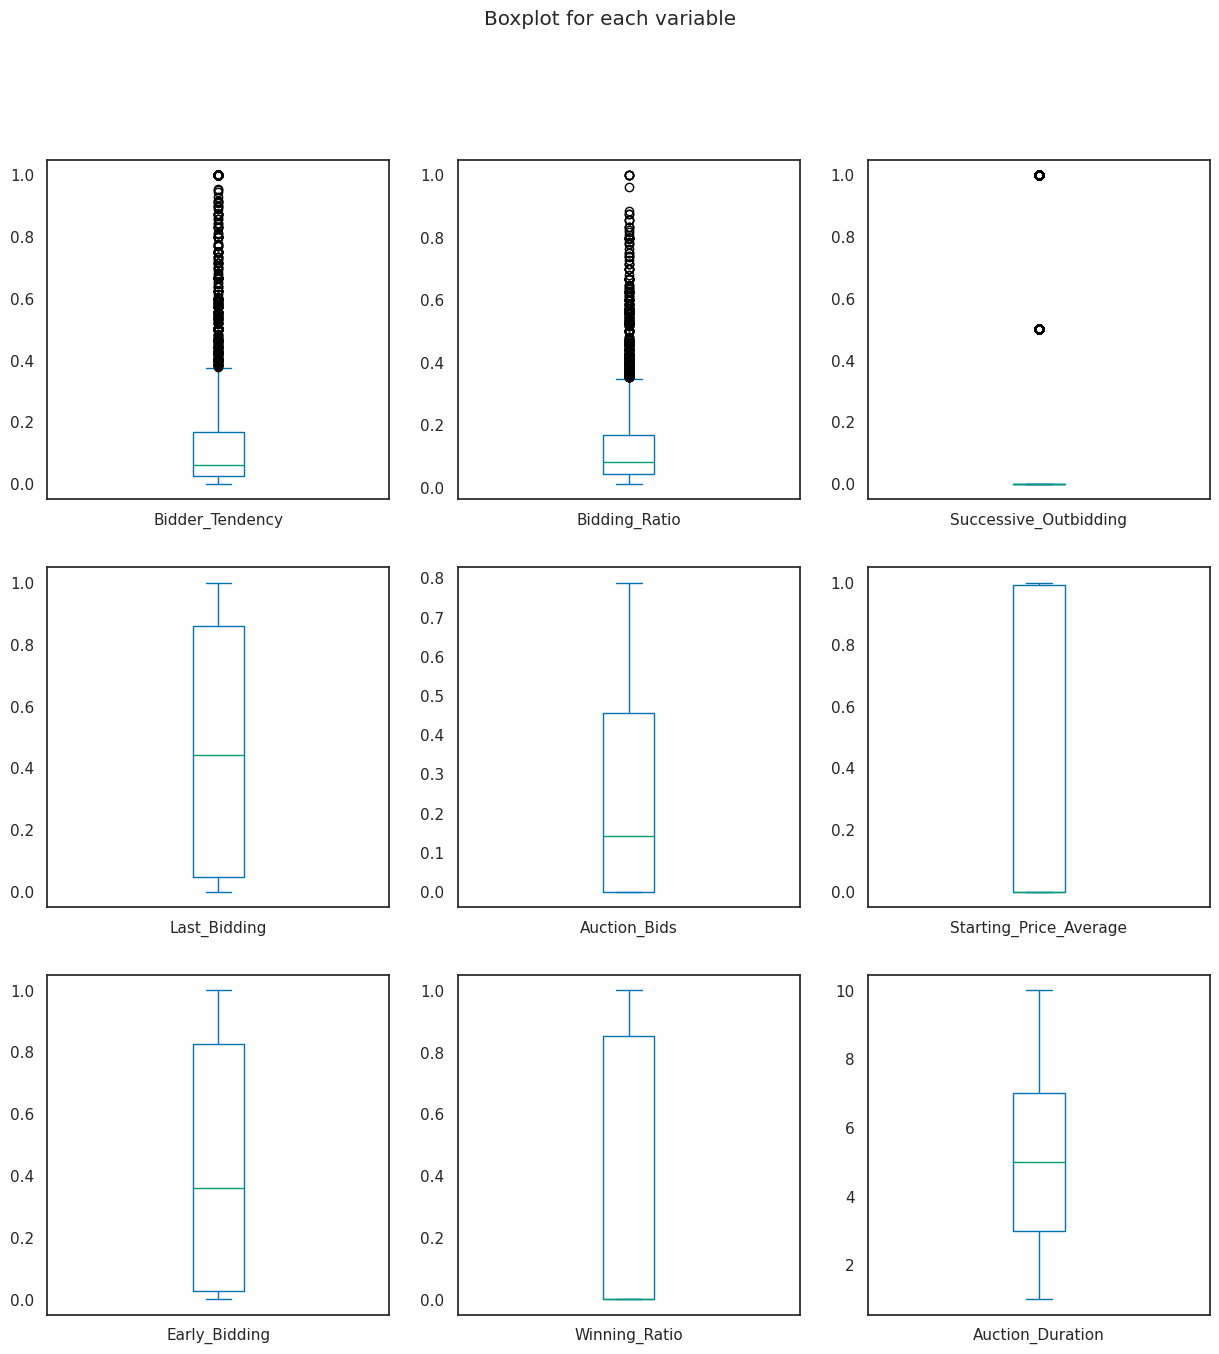

In [212]:
# Plotting boxplots to look for outliers

df2.drop('Class', axis = 1).plot(kind = 'box', subplots = True, layout = (3, 3), figsize = (15, 15),
                                 title = 'Boxplot for each variable');

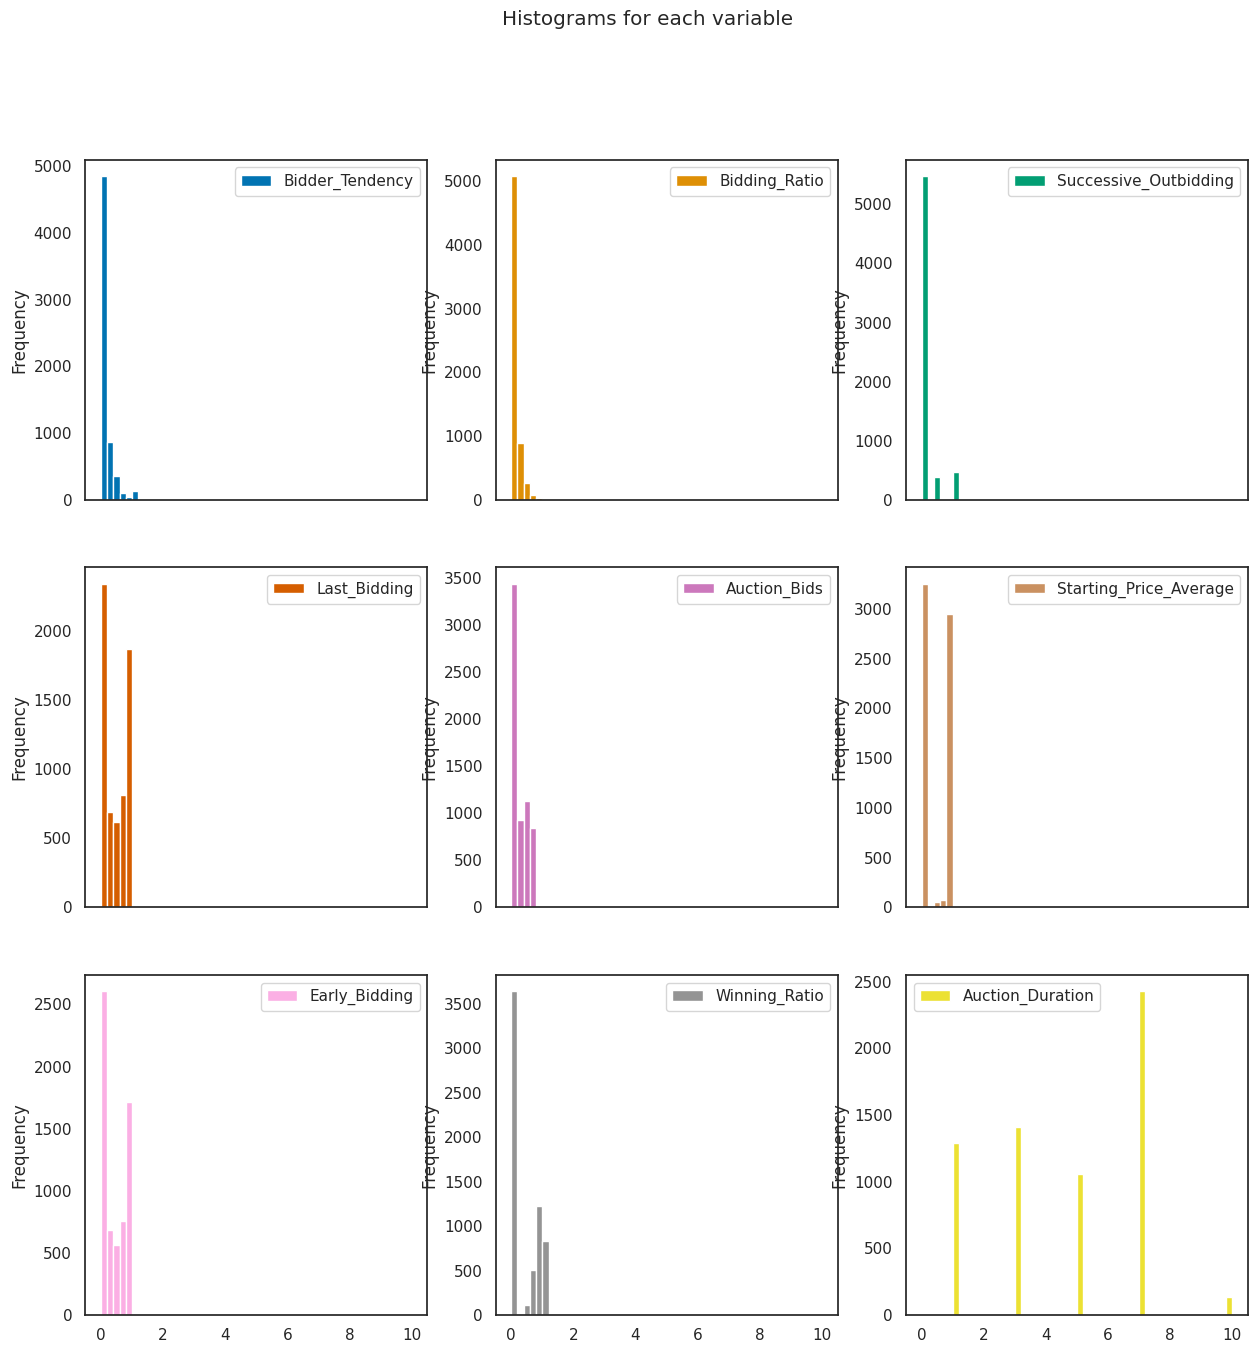

In [213]:
# Plotting histograms to look at the distribution of the attributes

df2.drop('Class', axis = 1).plot(kind = 'hist', subplots = True, layout = (3, 3), figsize = (15, 15), bins = 50,
                                 title = 'Histograms for each variable');

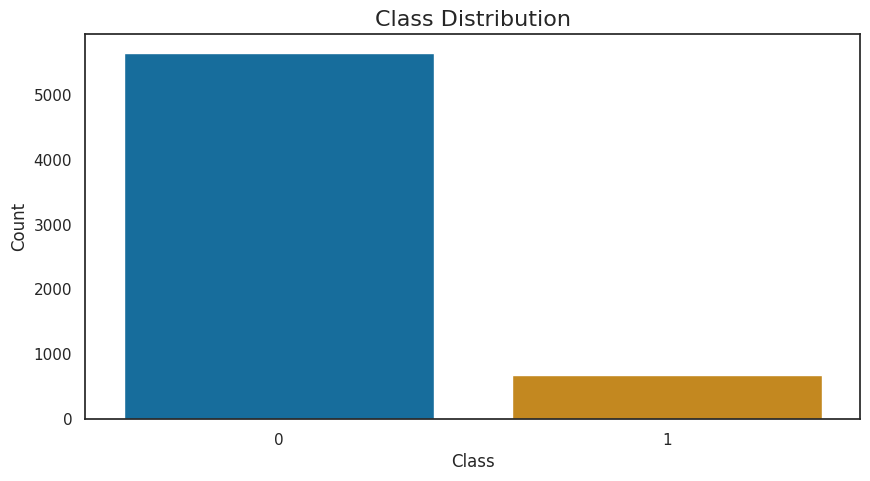

In [214]:
# Plotting a histogram to look at the distribuition of the dependent variable - "Class"

plt.figure(figsize = (10, 5))
count = sns.countplot(x = 'Class', data = df2)
count.axes.set_title('Class Distribution', fontsize = 16)
count.set_xlabel('Class')
count.set_ylabel('Count');

In [215]:
# Counting values and percentages of Class variable

print("Counts:")
print(df2.Class.value_counts())
print()
print("Percentages:")
print(df2.Class.value_counts() / len(df2.Class)) 

Counts:
0    5646
1     675
Name: Class, dtype: int64

Percentages:
0    0.893213
1    0.106787
Name: Class, dtype: float64


In [216]:
# Imbalance Ratio {Size of majority class}/{Size of minority class}

print('Imbalance Ratio:')
print(round(5645/675, 2))

Imbalance Ratio:
8.36


In [217]:
from sklearn.linear_model import LogisticRegression                     
from sklearn.tree import DecisionTreeClassifier

In [218]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [219]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [220]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' is not

In [221]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.977534 using {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}


In [222]:
logreg = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [223]:
print('Training score: {:.3f}'.format(logreg.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(logreg.score(X_test,y_test)))

Training score: 0.964
Testing score: 0.964


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1425
           1       0.94      0.68      0.79       156

    accuracy                           0.96      1581
   macro avg       0.95      0.84      0.88      1581
weighted avg       0.96      0.96      0.96      1581

Axes(0.125,0.11;0.775x0.77)


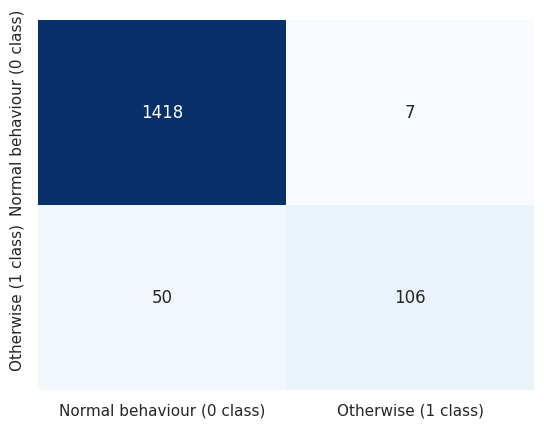

In [224]:
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

In [225]:
#Decision Tree
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [226]:
depth = range(1, 20)
leaf = range(1, 20)

In [227]:
grid = dict(max_depth=depth,min_samples_leaf=leaf)
grid_search = GridSearchCV(estimator=tree, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [228]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


Best: 0.997627 using {'max_depth': 7, 'min_samples_leaf': 3}


In [229]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [230]:
print('Training score: {:.3f}'.format(tree.score(X_train,y_train)))
print('Testing score: {:.3f}'.format(tree.score(X_test,y_test)))

Training score: 0.986
Testing score: 0.984


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1425
           1       0.99      0.85      0.91       156

    accuracy                           0.98      1581
   macro avg       0.98      0.93      0.95      1581
weighted avg       0.98      0.98      0.98      1581

Axes(0.125,0.11;0.775x0.77)


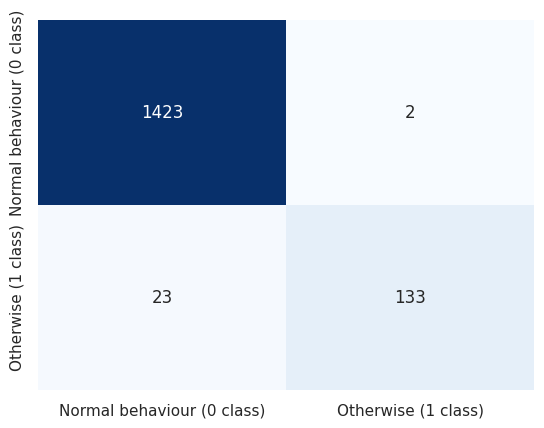

In [231]:
print(classification_report(y_test, y_pred))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

In [232]:
#. Apply Hyperparameter Tuning


In [233]:
X.isnull().sum()

Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
dtype: int64

In [234]:
X.head()


,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7


In [235]:
#Check size of data
X.shape

(6321, 9)

In [236]:
#Build Logistic Regression with Hyperparameter¶


In [237]:
logModel = LogisticRegression()


In [238]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [239]:
from sklearn.model_selection import GridSearchCV

In [240]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)


In [241]:
best_clf = clf.fit(X,y)


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [242]:
best_clf.best_estimator_


LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')

In [243]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')


Accuracy - : 0.978
